#Clasificador Naïve-Bayes

Probabilidad condicionada.

\begin{equation}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation}



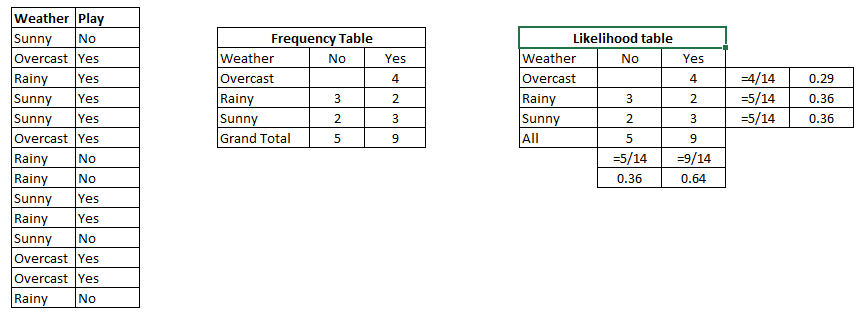

Ejemplo: probabilidad de jugar en un día soleado (tomado de https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/).

Muestreo total = 14.

\begin{align}
&P(\text{Sí}|\text{Soleado}) = \frac{P(\text{Soleado}|\text{Sí})*P(\text{Sí})}{P(\text{Soleado})} \\
&P(\text{Soleado}|\text{Sí}) = \frac{3}{9} = \frac{1}{3} \\
&P(\text{Sí}) = 9/14 \\
&P(\text{Soleado}) = 5/14 \\
&P(\text{Sí}|\text{Soleado}) = \frac{1/3*9/14}{5/14} \\
&P(\text{Sí}|\text{Soleado}) = 0.6
\end{align}

3 tipos de clasificadores:




1.   Multinomial: frecuencia de predictores/features, datos contables.
2.   Bernoulli: Predictores tipo Booleano.
3.   Gaussiano: Predictores continuos.


In [ ]:
from sklearn.datasets import load_breast_cancer

basebc = load_breast_cancer()

In [ ]:
basebc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
basebc["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
basebc["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
basebc["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
basebc["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(basebc['data'], basebc['target'], random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

bc_bayes = GaussianNB().fit(X_train1, y_train1)

bc_bayes

GaussianNB()

In [ ]:
bc_bayes.score(X_train1, y_train1)

0.9507042253521126

In [ ]:
bc_bayes.score(X_test1, y_test1)

0.9370629370629371

<Figure size 432x288 with 0 Axes>

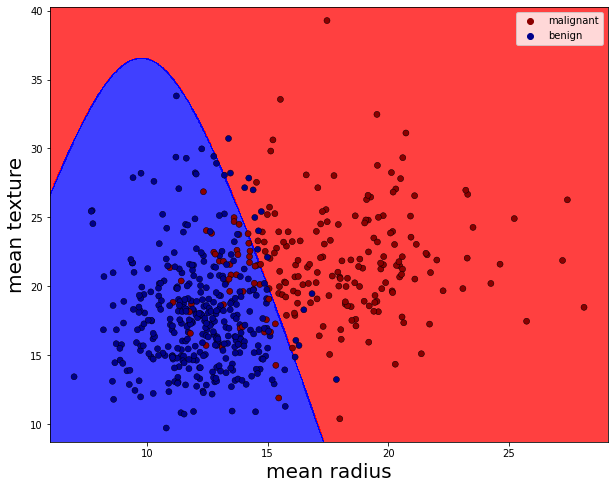

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

X = basebc["data"][:, :2]
y = basebc["target"]

cmap_light = ListedColormap(["red", "blue"])
cmap_bold = ["darkred", "darkblue"]

h = 0.04

bc_bayes1 = GaussianNB().fit(X, y)

plt.figure()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = bc_bayes1.predict(np.c_[xx.ravel(), yy.ravel()])

  
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.75)


sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=basebc.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(basebc.feature_names[0], fontsize=20)
plt.ylabel(basebc.feature_names[1], fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

plt.show()

In [ ]:
type(X)

numpy.ndarray

In [ ]:
bc_bayes1.score(X,y)

0.8857644991212654

In [ ]:
import pandas as pd

Xdf = pd.DataFrame(basebc["data"], columns = basebc.feature_names)
Xdf.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
Xdf.iloc[:, [1, 3]]

,mean texture,mean area
0,10.38,1001.0
1,17.77,1326.0
2,21.25,1203.0
3,20.38,386.1
4,14.34,1297.0
...,...,...
564,22.39,1479.0
565,28.25,1261.0
566,28.08,858.1
567,29.33,1265.0


In [ ]:
Xdf.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
Xdf.iloc[:, [0, 4]].head()

,mean radius,mean smoothness
0,17.99,0.11840
1,20.57,0.08474
2,19.69,0.10960
3,11.42,0.14250
4,20.29,0.10030


In [ ]:
basebc["data"][:, 0:6:4]

array([[17.99   ,  0.1184 ],
       [20.57   ,  0.08474],
       [19.69   ,  0.1096 ],
       ...,
       [16.6    ,  0.08455],
       [20.6    ,  0.1178 ],
       [ 7.76   ,  0.05263]])

<Figure size 432x288 with 0 Axes>

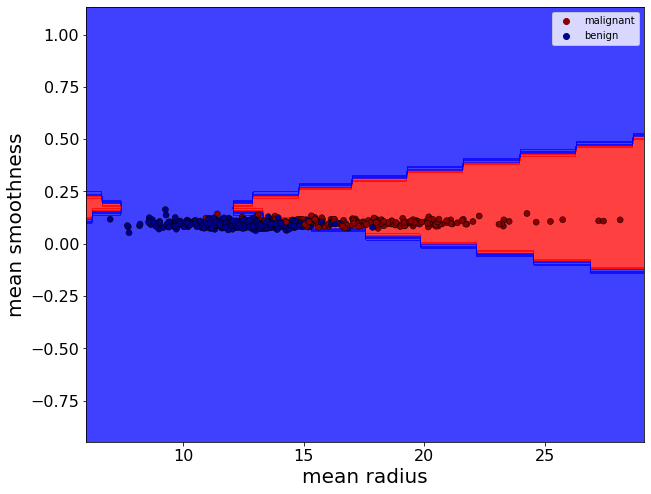

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

X = basebc["data"][:, 0:6:4]
y = basebc["target"]

cmap_light = ListedColormap(["red", "blue"])
cmap_bold = ["darkred", "darkblue"]

h = 0.04

bc_bayes2 = GaussianNB().fit(X, y)

plt.figure()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = bc_bayes2.predict(np.c_[xx.ravel(), yy.ravel()])

  
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.75)


sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=basebc.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(basebc.feature_names[0], fontsize=20)
plt.ylabel(basebc.feature_names[4], fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

plt.show()

In [ ]:
basebc["data"][:, 2:4]

array([[ 122.8 , 1001.  ],
       [ 132.9 , 1326.  ],
       [ 130.  , 1203.  ],
       ...,
       [ 108.3 ,  858.1 ],
       [ 140.1 , 1265.  ],
       [  47.92,  181.  ]])

<Figure size 432x288 with 0 Axes>

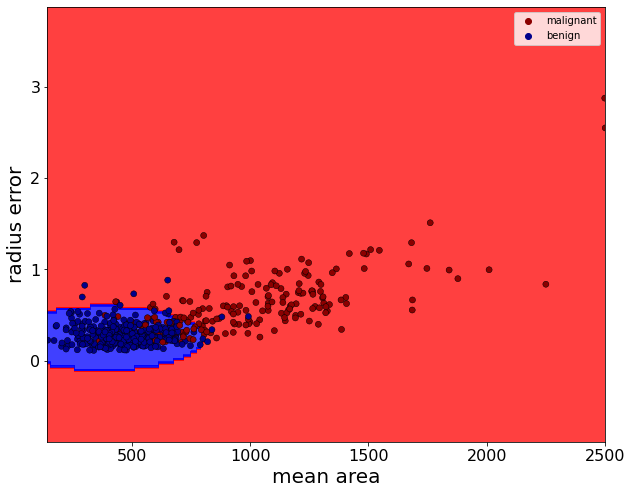

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

X = basebc["data"][:, 3:11:7]
y = basebc["target"]

cmap_light = ListedColormap(["red", "blue"])
cmap_bold = ["darkred", "darkblue"]

h = 0.04

bc_bayes2 = GaussianNB().fit(X, y)

plt.figure()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = bc_bayes2.predict(np.c_[xx.ravel(), yy.ravel()])

  
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.75)


sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=basebc.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(basebc.feature_names[3], fontsize=20)
plt.ylabel(basebc.feature_names[10], fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

plt.show()

In [ ]:
bc_bayes2.score(X,y)

0.8769771528998243

In [ ]:
X_train1a, X_test1a, y_train1a, y_test1a = train_test_split(basebc['data'][:, 0:5], basebc['target'], random_state = 0)

In [ ]:
bc_bayes3 = GaussianNB().fit(X_train1a, y_train1a)

bc_bayes3.score(X_train1a, y_train1a)

0.8990610328638498

In [ ]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [ ]:
iris_bayes = GaussianNB().fit(X_train2, y_train2)

print(iris_bayes.score(X_train2, y_train2))
print(iris_bayes.score(X_test2, y_test2))

0.9464285714285714
1.0


#Árboles de decisión



1.   Preguntas sí/no
2.   Clasificación


In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

iris_dataset = load_iris()

X_train2, X_test2, y_train2, y_test2 = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [3]:
Decision_tree = DecisionTreeClassifier().fit(X_train2, y_train2)

Decision_tree.score(X_train2, y_train2)

1.0

In [4]:
Decision_tree.score(X_test2, y_test2)

0.9736842105263158

<Figure size 432x288 with 0 Axes>

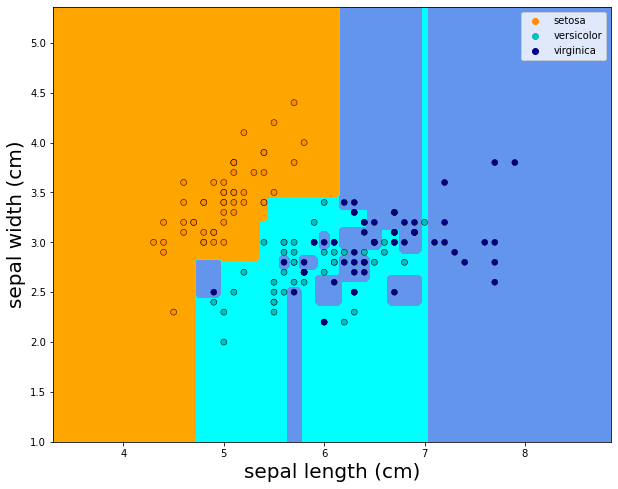

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

X = iris_dataset["data"][:, :2]
y = iris_dataset["target"]

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

h = 0.04

Decision_tree1 = DecisionTreeClassifier().fit(X, y)

plt.figure()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Decision_tree1.predict(np.c_[xx.ravel(), yy.ravel()])

  
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)


sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris_dataset.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(iris_dataset.feature_names[0], fontsize=20)
plt.ylabel(iris_dataset.feature_names[1], fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

plt.show()

#Máxima profundidad (Max depth)

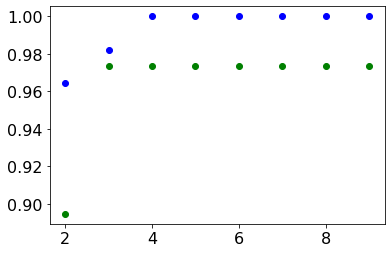

In [6]:
listtr1 = []
listte1 = []

for n in range(2,10):
  Decision_tree_n = DecisionTreeClassifier(max_depth=n).fit(X_train2, y_train2)
  listtr1.append(Decision_tree_n.score(X_train2, y_train2))
  listte1.append(Decision_tree_n.score(X_test2, y_test2))

plt.figure()
plt.scatter(range(2,10), listtr1, color = 'blue')
plt.scatter(range(2,10), listte1, color = 'green')

<Figure size 432x288 with 0 Axes>

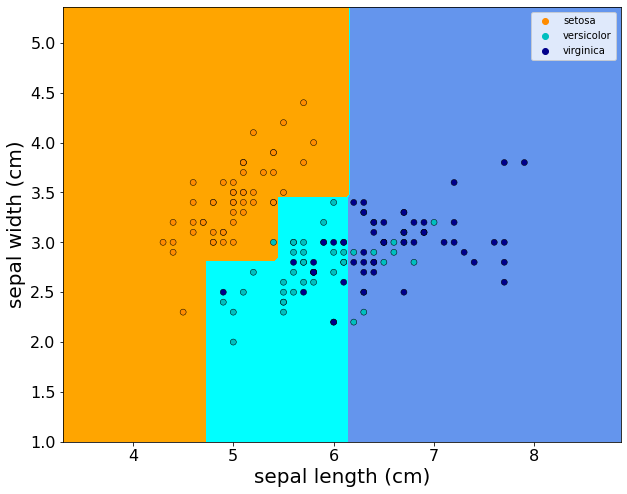

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

X = iris_dataset["data"][:, :2]
y = iris_dataset["target"]

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

h = 0.04

Decision_tree2 = DecisionTreeClassifier(max_depth = 3).fit(X, y)

plt.figure()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Decision_tree2.predict(np.c_[xx.ravel(), yy.ravel()])

  
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)


sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris_dataset.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel(iris_dataset.feature_names[0], fontsize=20)
plt.ylabel(iris_dataset.feature_names[1], fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

plt.show()

In [8]:
Decision_tree2.score(X,y)

0.8133333333333334

#Matriz de confusión

Algoritmo para clasificaciones.

Si la clasificación es binaria (clases 0 y 1),

\begin{equation}
\begin{pmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11}
\end{pmatrix}
\end{equation}

Filas: clases verdaderas.
Columnas: clases predichas.

\begin{align}
&a_{00}: \text{Clase 0, predicho como 0} \\
&a_{01}: \text{Clase 0, predicho como 1} \\
&a_{10}: \text{Clase 1, predicho como 0} \\
&a_{11}: \text{Clase 1, predicho como 1}
\end{align}

Conjuntos a utilizar: clases de predicción + clases del conjunto *test*.

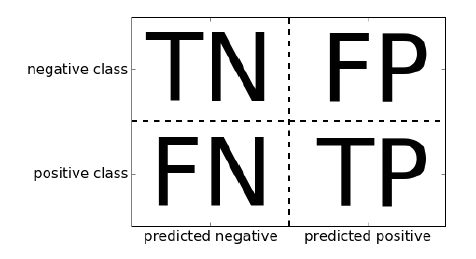


#Métricas para la clasificación

\begin{align}
&\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN} \\
&\text{Precision}=\frac{TP}{TP+FP}\\
&\text{Recall} = \frac{TP}{TP+FN} \\
&F_{1} = \frac{2*\text{Precision}}{\text{Precision} + \text{Recall}}
\end{align}

In [9]:
from sklearn.datasets import load_breast_cancer

basebc = load_breast_cancer()

X_train1, X_test1, y_train1, y_test1 = train_test_split(basebc['data'], basebc['target'], random_state = 0)

In [10]:
from sklearn.metrics import confusion_matrix

Decision_tree_c = DecisionTreeClassifier().fit(X_train1, y_train1)

pred_dt_c = Decision_tree_c.predict(X_test1)

confusion = confusion_matrix(y_test1, pred_dt_c)

print("Matriz de confusión\n{}".format(confusion))

Matriz de confusión
[[50  3]
 [16 74]]


In [11]:
for n in range(1,11):
  Decision_tree_cn = DecisionTreeClassifier(max_depth = n).fit(X_train1, y_train1)
  pred_dt_cn = Decision_tree_cn.predict(X_test1)

  confusion = confusion_matrix(y_test1, pred_dt_cn)

  print("Matriz de confusión, profundidad {}: \n{}".format(n,confusion))

Matriz de confusión, profundidad 1: 
[[48  5]
 [12 78]]
Matriz de confusión, profundidad 2: 
[[48  5]
 [ 4 86]]
Matriz de confusión, profundidad 3: 
[[51  2]
 [10 80]]
Matriz de confusión, profundidad 4: 
[[51  2]
 [ 8 82]]
Matriz de confusión, profundidad 5: 
[[52  1]
 [ 8 82]]
Matriz de confusión, profundidad 6: 
[[50  3]
 [14 76]]
Matriz de confusión, profundidad 7: 
[[50  3]
 [10 80]]
Matriz de confusión, profundidad 8: 
[[49  4]
 [16 74]]
Matriz de confusión, profundidad 9: 
[[49  4]
 [16 74]]
Matriz de confusión, profundidad 10: 
[[50  3]
 [14 76]]


In [12]:
print("Predicción con Naïve-Bayes")

from sklearn.naive_bayes import GaussianNB
bc_bayes_c = GaussianNB().fit(X_train1, y_train1)
pred_dt_cb = bc_bayes_c.predict(X_test1)

confusion = confusion_matrix(y_test1, pred_dt_cb)

print("Matriz de confusión: \n{}".format(confusion))

Predicción con Naïve-Bayes
Matriz de confusión: 
[[48  5]
 [ 4 86]]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test1, pred_dt_cb)))
print('Precision: {:.2f}'.format(precision_score(y_test1, pred_dt_cb)))
print('Recall: {:.2f}'.format(recall_score(y_test1, pred_dt_cb)))
print('F1: {:.2f}'.format(f1_score(y_test1, pred_dt_cb)))

Accuracy: 0.94
Precision: 0.95
Recall: 0.96
F1: 0.95


In [14]:
Decision_tree_c3 = DecisionTreeClassifier(max_depth = 2).fit(X_train1, y_train1)
pred_dt_c3 = Decision_tree_c3.predict(X_test1)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test1, pred_dt_c3)))
print('Precision: {:.2f}'.format(precision_score(y_test1, pred_dt_c3)))
print('Recall: {:.2f}'.format(recall_score(y_test1, pred_dt_c3)))
print('F1: {:.2f}'.format(f1_score(y_test1, pred_dt_c3)))

Accuracy: 0.92
Precision: 0.93
Recall: 0.94
F1: 0.94


In [15]:
Decision_tree_c3 = DecisionTreeClassifier(max_depth = 8).fit(X_train1, y_train1)
pred_dt_c3 = Decision_tree_c3.predict(X_test1)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test1, pred_dt_c3)))
print('Precision: {:.2f}'.format(precision_score(y_test1, pred_dt_c3)))
print('Recall: {:.2f}'.format(recall_score(y_test1, pred_dt_c3)))
print('F1: {:.2f}'.format(f1_score(y_test1, pred_dt_c3)))

Accuracy: 0.89
Precision: 0.95
Recall: 0.87
F1: 0.91


In [16]:
basebc["data"][:,0:4]

array([[  17.99,   10.38,  122.8 , 1001.  ],
       [  20.57,   17.77,  132.9 , 1326.  ],
       [  19.69,   21.25,  130.  , 1203.  ],
       ...,
       [  16.6 ,   28.08,  108.3 ,  858.1 ],
       [  20.6 ,   29.33,  140.1 , 1265.  ],
       [   7.76,   24.54,   47.92,  181.  ]])

In [17]:
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(basebc['data'][:,0:4], basebc['target'], random_state = 0)

Decision_tree_c4 = DecisionTreeClassifier(max_depth = 2).fit(X_train1b, y_train1b)
pred_dt_c4 = Decision_tree_c4.predict(X_test1b)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test1b, pred_dt_c4)))
print('Precision: {:.2f}'.format(precision_score(y_test1b, pred_dt_c4)))
print('Recall: {:.2f}'.format(recall_score(y_test1b, pred_dt_c4)))
print('F1: {:.2f}'.format(f1_score(y_test1b, pred_dt_c4)))

Accuracy: 0.90
Precision: 0.89
Recall: 0.97
F1: 0.93


In [19]:
Decision_tree_c4.score(X_test1b, y_test1b)

0.9020979020979021

In [27]:
from sklearn.linear_model import LogisticRegression

X_train1c, X_test1c, y_train1c, y_test1c = train_test_split(basebc['data'][:, :6], basebc['target'], random_state = 0)

logreg= LogisticRegression()
logreg.fit(X_train1c,y_train1c)
y_pred=logreg.predict(X_test1c)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test1c, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test1c, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test1c, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test1c, y_pred)))

Accuracy: 0.91
Precision: 0.94
Recall: 0.91
F1: 0.93


In [28]:
confusion = confusion_matrix(y_test1c, y_pred)

print("Matriz de confusión: \n{}".format(confusion))

Matriz de confusión: 
[[48  5]
 [ 8 82]]


#Ejercicio:

Tomando el siguiente resultado de un muestreo

\begin{align}
&TP = 30\\
&TN = 930\\
&FN = 10\\
&FP = 30
\end{align},

calcule Accuracy, Precision y Recall.